In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
df= pd.read_csv('SolarPrediction.csv')
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
11612,1476732625,10/17/2016 12:00:00 AM,09:30:25,746.96,63,30.48,17,90.35,6.75,06:18:00,17:58:00
11613,1476732323,10/17/2016 12:00:00 AM,09:25:23,730.94,63,30.48,19,47.96,3.37,06:18:00,17:58:00
11614,1476732022,10/17/2016 12:00:00 AM,09:20:22,715.16,63,30.48,17,61.99,10.12,06:18:00,17:58:00
11615,1476731719,10/17/2016 12:00:00 AM,09:15:19,699.19,63,30.48,15,64.42,6.75,06:18:00,17:58:00


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


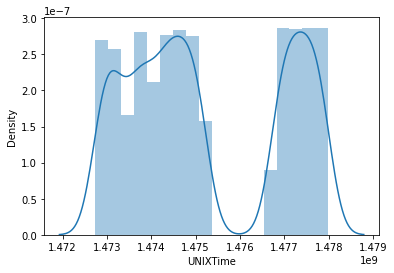

In [4]:
sns.distplot(df['UNIXTime'])

In [5]:
df=df.drop(['Data','Time','TimeSunRise','TimeSunSet'],axis=1)
df

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1475229326,1.21,48,30.46,59,177.39,5.62
1,1475229023,1.21,48,30.46,58,176.78,3.37
2,1475228726,1.23,48,30.46,57,158.75,3.37
3,1475228421,1.21,48,30.46,60,137.71,3.37
4,1475228124,1.17,48,30.46,62,104.95,5.62
...,...,...,...,...,...,...,...
11612,1476732625,746.96,63,30.48,17,90.35,6.75
11613,1476732323,730.94,63,30.48,19,47.96,3.37
11614,1476732022,715.16,63,30.48,17,61.99,10.12
11615,1476731719,699.19,63,30.48,15,64.42,6.75


In [12]:
df = df.dropna()

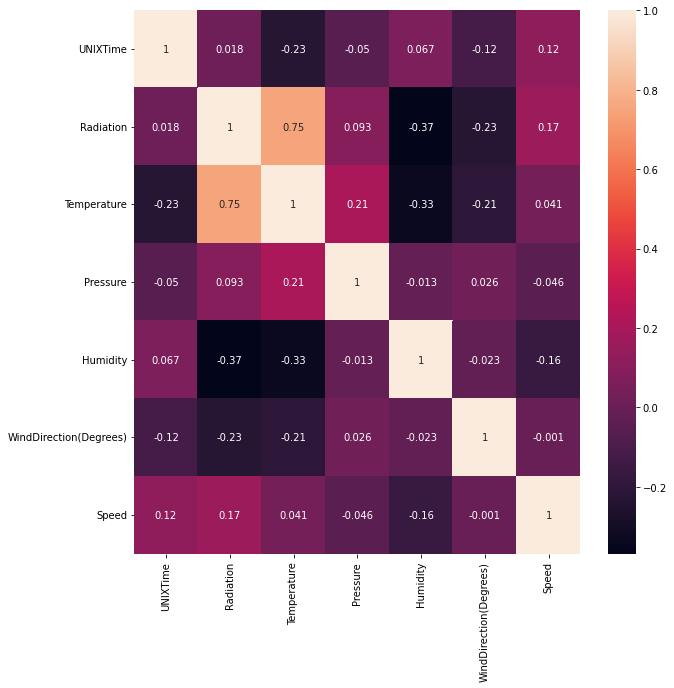

In [6]:
figure= plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Figure size 1440x720 with 0 Axes>

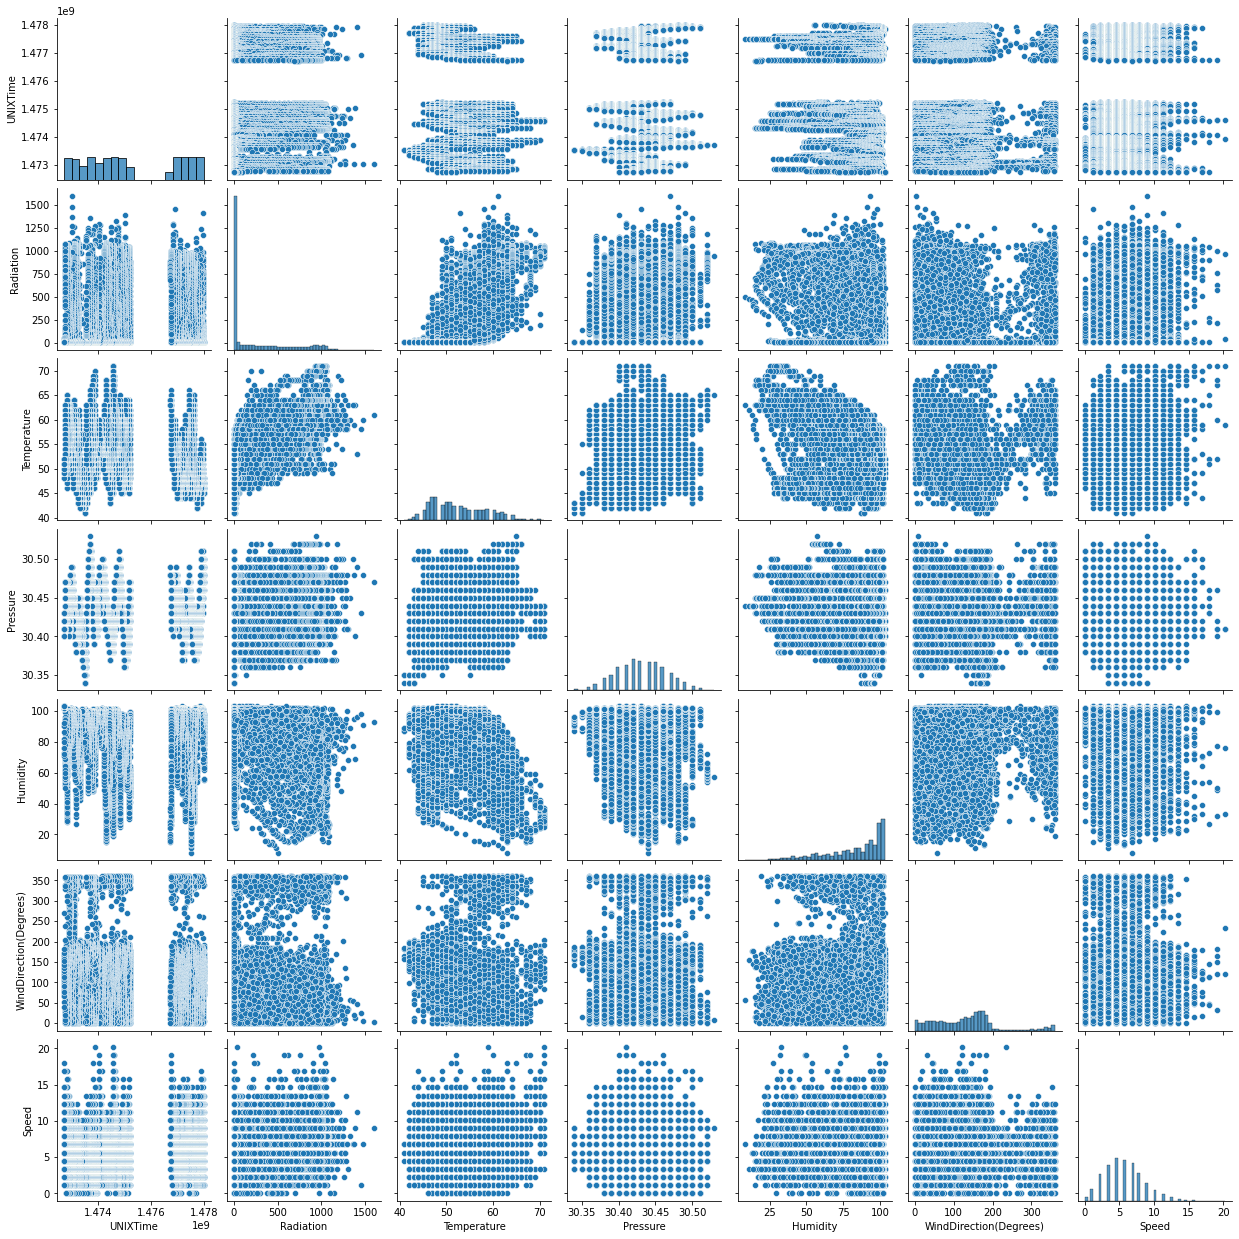

In [7]:
figure= plt.figure(figsize=(20,10))
sns.pairplot(df)

In [18]:
df_X = df.drop('Radiation',axis=1)

In [20]:
X=df_X
y=df['Radiation']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [23]:
ada_reg= AdaBoostRegressor(RandomForestRegressor())
ada_reg.fit(X_train,y_train)


AdaBoostRegressor(base_estimator=RandomForestRegressor())

# New section

In [24]:
ada_reg.score(X_test,y_test)


0.9107668830709955

In [ ]:
y_pred=ada_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.9124857347237976
